In [1]:
import pandas as pd

In [2]:
df_ly = pd.read_csv("/data_new/home/yhr/code/歌词情感分析/data1(1).csv",error_bad_lines=False) 

In [3]:
df_dic = pd.read_excel("/data_new/home/yhr/code/歌词情感分析/词典.xls") 

In [6]:
df_dic = df_dic[['词语', '强度', '极性']]


In [7]:
df_dic

,词语,强度,极性
0,脏乱,7,2
1,糟报,5,2
2,早衰,5,2
3,责备,5,2
4,贼眼,5,2
...,...,...,...
27575,用力过度,3,2
27576,操蛋,5,2
27577,无言以对,5,2
27578,糟践,7,2


In [11]:
df_dic = pd.read_excel('/data_new/home/yhr/code/歌词情感分析/情感词汇本体.xls', keep_default_na = False)
df_dic = df_dic[['词语', '情感分类','强度', '极性']]
df_dic.head()

,词语,情感分类,强度,极性
0,脏乱,NN,7,2
1,糟报,NN,5,2
2,早衰,NE,5,2
3,责备,NN,5,2
4,贼眼,NN,5,2


In [12]:
df_dic

,词语,情感分类,强度,极性
0,脏乱,NN,7,2
1,糟报,NN,5,2
2,早衰,NE,5,2
3,责备,NN,5,2
4,贼眼,NN,5,2
...,...,...,...,...
27461,增生,PA,7,2
27462,正兒巴经,PH,5,1
27463,智藏瘝在,NI,7,2
27464,重点,NI,7,0


In [13]:
Happy = []
Good = []
Surprise = []
Anger = []
Sad = []
Fear = []
Disgust = []
for idx, row in df_dic.iterrows():
    if row['情感分类'] in ['PA', 'PE']:
        Happy.append(row['词语'])
    if row['情感分类'] in ['PD', 'PH', 'PG', 'PB', 'PK']:
        Good.append(row['词语']) 
    if row['情感分类'] in ['PC']:
        Surprise.append(row['词语'])     
    if row['情感分类'] in ['NA']:
        Anger.append(row['词语'])    
    if row['情感分类'] in ['NB', 'NJ', 'NH', 'PF']:
        Sad.append(row['词语'])
    if row['情感分类'] in ['NI', 'NC', 'NG']:
        Fear.append(row['词语'])
    if row['情感分类'] in ['NE', 'ND', 'NN', 'NK', 'NL']:
        Disgust.append(row['词语'])
Positive = Happy + Good +Surprise
Negative = Anger + Sad + Fear + Disgust
print('情绪词语列表整理完成') 

情绪词语列表整理完成


In [14]:
import jieba
import time
def emotion_caculate(text):
    positive = 0
    negative = 0
    anger = 0
    disgust = 0
    fear = 0
    sad = 0
    surprise = 0
    good = 0
    happy = 0
    wordlist = jieba.lcut(text)
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive+=freq
        if word in Negative:
            negative+=freq
        if word in Anger:
            anger+=freq
        if word in Disgust:
            disgust+=freq
        if word in Fear:
            fear+=freq
        if word in Sad:
            sad+=freq
        if word in Surprise:
            surprise+=freq
        if word in Good:
            good+=freq
        if word in Happy:
            happy+=freq
    emotion_info = {
        'length':len(wordlist),
        'positive': positive,
        'negative': negative,
        'anger': anger,
        'disgust': disgust,
        'fear':fear,
        'good':good,
        'sadness':sad,
        'surprise':surprise,
        'happy':happy,
    }
    indexs = ['length', 'positive', 'negative', 'anger', 'disgust','fear','sadness','surprise', 'good', 'happy']
    return pd.Series(emotion_info, index=indexs)

emotion_caculate(text='这个国家再对这些制造假冒伪劣食品药品的人手软的话，气愤愤，扑杀此獠，那后果真的会相当糟糕。坐牢？从快判个死刑')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.794 seconds.
Prefix dict has been built successfully.


length      29
positive     0
negative     6
anger        2
disgust      4
fear         0
sadness      0
surprise     0
good         0
happy        0
dtype: int64

In [36]:
romance = pd.read_csv('/data_new/home/yhr/code/歌词情感分析/主题/爱情.csv')
growup = pd.read_csv('/data_new/home/yhr/code/歌词情感分析/主题/成长.csv')
politic = pd.read_csv('/data_new/home/yhr/code/歌词情感分析/主题/红色.csv')
educate = pd.read_csv('/data_new/home/yhr/code/歌词情感分析/主题/教育.csv')
encourage = pd.read_csv('/data_new/home/yhr/code/歌词情感分析/主题/励志.csv')

In [43]:
def total_emotion(theme) :
    emotionlist=[]
    for idx, row in theme.iterrows():
        emotionlist.append(emotion_caculate(row['lirics']))  

    # 使用 pd.concat 将列表中的所有 Series 合并为一个 DataFrame
    emotion_df = pd.concat(emotionlist, axis=1).T.reset_index(drop=True)

    # 打印生成的 DataFrame
    return emotion_df  

In [44]:
total_list=[]
for i in [romance,growup,politic,educate,encourage]:
    total_list.append(total_emotion(i))


In [56]:
sum_list

[<bound method DataFrame.sum of      length  positive  negative  anger  disgust  fear  sadness  surprise  \
 0       275         4         7      0        1     0        6         0   
 1       243        18        14      0        8     0        6         0   
 2       213        17        12      0        4     1        7         0   
 3       346         9        14      0        8     3        3         0   
 4       190        22        10      0        5     0        5         0   
 ..      ...       ...       ...    ...      ...   ...      ...       ...   
 456     240         1         3      0        0     0        3         0   
 457     186         7        21      0        3     0       18         0   
 458     251        14         3      0        3     1        0         0   
 459     156         5         9      0        8     1        0         1   
 460     175        13        14      0        6     0        8         0   
 
      good  happy  
 0       4      0  
 1 

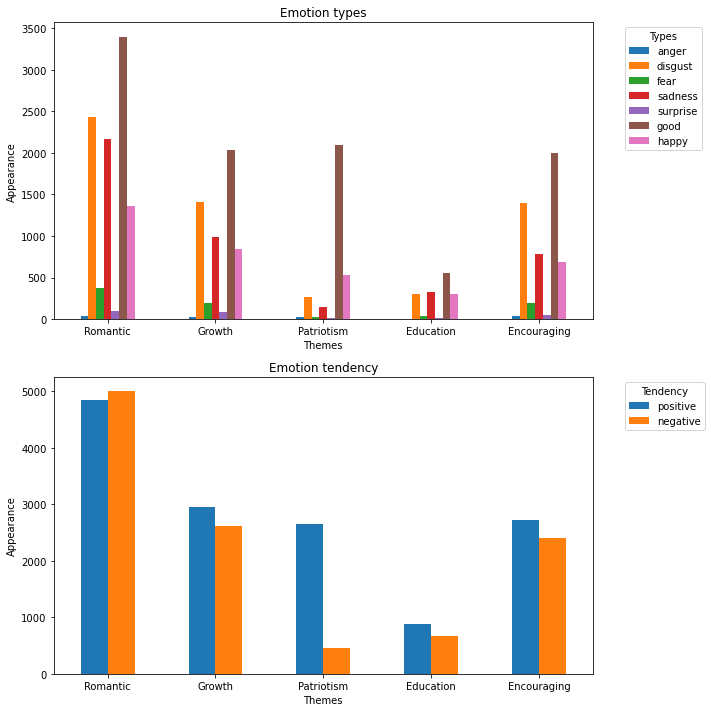

In [82]:

import matplotlib.pyplot as plt

# 设置字体为中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号


# 假设你有一个名为 song_dataframes 的列表，包含五个 DataFrame
# 每个 DataFrame 代表一类歌曲

# 示例数据
song_dataframes = total_list

# 初始化一个空的 DataFrame，用于存储每种情绪的总和
emotion_sum_df = pd.DataFrame()

# 遍历每个 DataFrame，计算每种情绪的总和
for df in song_dataframes:
    # 使用 groupby 按情绪类别对每个 DataFrame 进行分组求和
    emotion_sum = df.drop('length', axis=1).sum()
    emotion_sum_df = pd.concat([emotion_sum_df, emotion_sum], axis=1)

# 将结果转置，重置索引
emotion_sum_df = emotion_sum_df.T.reset_index(drop=True)

# 绘制频数条形图
categories = ['Romantic', 'Growth', 'Patriotism', 'Education', 'Encouraging']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
emotion_sum_df.drop(['positive', 'negative'], axis=1).plot(kind='bar', stacked=False, ax=ax1)

ax1.set_title('Emotion types')
ax1.set_xlabel('Themes')
ax1.set_ylabel('Appearance')
ax1.legend(title='Types', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(categories, rotation=0)

# 绘制'positive'和'negative'的频数条形图
emotion_sum_df[['positive', 'negative']].plot(kind='bar', stacked=False, ax=ax2)
ax2.set_title('Emotion tendency')
ax2.set_xlabel('Themes')
ax2.set_ylabel('Appearance')
ax2.legend(title='Tendency', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticklabels(categories, rotation=0)
plt.tight_layout()
plt.savefig('/data_new/home/yhr/code/歌词情感分析/各类别情感直方图.png')
plt.show()




In [83]:
romance

,song,singer,lirics
0,成都,赵雷,赵雷/喜子/姜北生让我掉下眼泪的不止昨夜的酒让我依依不舍的不止你的温柔余路还要走多久你攥着...
1,消愁,毛不易,李健/赵兆当你走进这欢乐场背上所有的梦与想各色的脸上各色的妆没人记得你的模样三巡酒过你在角...
2,祝我快乐,汪苏泷,北京大象无形音乐有限公司一个表情抚平几场过去的不测一句话语解开几段未来的曲折偶然我有能力叫...
3,置底,徐秉龙,网易电波我知道我说的话没有那么的风趣也知道突然不联系是我话题生硬我以为把你消息设置强提醒可取...
4,等你的日子不值一提,焦迈奇,许蔚天流徙在眼里的鱼 摆脱了孤寂放逐在遥远边境 的某座岛屿蜷缩在角落哭泣 无助的孩提你更愿...
...,...,...,...
456,这城市风总是很大,枯木逢春,叁七3SEVEN喝醉的人还在不休说留下的人早已远走沿着街灯一直往南走没人会停留街边的风还在...
457,余恨情长,王贰浪,筱筱雨沐初见时惊鸿一瞥，浮生若梦是你转身时目光回转，刻骨铭心是你回眸时一笑嫣然，望眼欲穿是...
458,爱你,王贰浪,陈芳语我闭上眼睛 贴着你心跳呼吸而此刻地球 只剩我们而已你微笑的唇型 总勾着我的心每一秒初吻...
459,别怕 我在,隔壁老樊,林逸航你小心翼翼抬起头看着黑暗 透进一束温暖的光别怕那是我来到你身旁别坐角落 让我看看你模...


In [86]:
df = pd.DataFrame(df_dic)

# 将 '极性' 列中的值为 2 替换为 -1
df['极性'] = df['极性'].replace(2, -1)

# 打印结果
print(df)
df_dic=df


         词语 情感分类  强度  极性
0        脏乱   NN   7  -1
1        糟报   NN   5  -1
2        早衰   NE   5  -1
3        责备   NN   5  -1
4        贼眼   NN   5  -1
...     ...  ...  ..  ..
27461    增生   PA   7  -1
27462  正兒巴经   PH   5   1
27463  智藏瘝在   NI   7  -1
27464    重点   NI   7   0
27465    烛花   PB   5   1

[27466 rows x 4 columns]


In [87]:
romance

,song,singer,lirics
0,成都,赵雷,赵雷/喜子/姜北生让我掉下眼泪的不止昨夜的酒让我依依不舍的不止你的温柔余路还要走多久你攥着...
1,消愁,毛不易,李健/赵兆当你走进这欢乐场背上所有的梦与想各色的脸上各色的妆没人记得你的模样三巡酒过你在角...
2,祝我快乐,汪苏泷,北京大象无形音乐有限公司一个表情抚平几场过去的不测一句话语解开几段未来的曲折偶然我有能力叫...
3,置底,徐秉龙,网易电波我知道我说的话没有那么的风趣也知道突然不联系是我话题生硬我以为把你消息设置强提醒可取...
4,等你的日子不值一提,焦迈奇,许蔚天流徙在眼里的鱼 摆脱了孤寂放逐在遥远边境 的某座岛屿蜷缩在角落哭泣 无助的孩提你更愿...
...,...,...,...
456,这城市风总是很大,枯木逢春,叁七3SEVEN喝醉的人还在不休说留下的人早已远走沿着街灯一直往南走没人会停留街边的风还在...
457,余恨情长,王贰浪,筱筱雨沐初见时惊鸿一瞥，浮生若梦是你转身时目光回转，刻骨铭心是你回眸时一笑嫣然，望眼欲穿是...
458,爱你,王贰浪,陈芳语我闭上眼睛 贴着你心跳呼吸而此刻地球 只剩我们而已你微笑的唇型 总勾着我的心每一秒初吻...
459,别怕 我在,隔壁老樊,林逸航你小心翼翼抬起头看着黑暗 透进一束温暖的光别怕那是我来到你身旁别坐角落 让我看看你模...


In [143]:
# 示例数据，假设你有一个情感词典 DataFrame 和歌曲数据
emotion_dict_data = df_dic

emotion_dict = pd.DataFrame(emotion_dict_data)
def calculate_score(theme):
        song_data = theme
        songs = pd.DataFrame(song_data)

        # 初始化歌曲情感得分列表
        song_scores = []

        # 遍历每首歌曲
        for idx, row in songs.iterrows():
                wordlist = jieba.lcut(row['lyric'])
                wordset = set(wordlist)
                # 初始化情感得分
                total_score = 0
                # 统计歌词总数
                total_words = len(wordlist)

                # 遍历歌词
                for word in wordlist:
                # 检查词语是否在情感词典中
                        word_info = emotion_dict[emotion_dict['词语'] == word]
                        if not word_info.empty:
                                # 如果词语在情感词典中，根据情感倾向和强弱进行加分或减分
                                total_score += word_info['极性'].values[0] * word_info['强度'].values[0]

        # 归一化得分
                normalized_score = total_score / total_words if total_words > 0 else 0

                # 将歌曲ID和得分加入列表
                song_scores.append({'song': row['song'], '得分': normalized_score})

        # 将结果转换为DataFrame
        result_df = pd.DataFrame(song_scores)
        return result_df

# 打印结果



In [116]:
total_score=[]
for i in [romance,growup,politic,educate,encourage]:
    total_score.append(calculate_score(i))

In [117]:
total_score

[          song        得分
 0           成都  0.000000
 1           消愁  0.156379
 2         祝我快乐  0.352113
 3           置底  0.000000
 4    等你的日子不值一提  0.305263
 ..         ...       ...
 456   这城市风总是很大  0.020833
 457       余恨情长 -0.059140
 458         爱你  0.262948
 459      别怕 我在 -0.012821
 460       初秋和你  0.131429
 
 [461 rows x 2 columns],
         song        得分
 0    挥着翅膀的女孩  0.095238
 1         倔强 -0.171875
 2      我们在改变 -0.082569
 3      新诗十六岁  0.301370
 4        生命树 -0.073359
 ..       ...       ...
 233  像我这样的少年  0.013953
 234      小白船  0.314286
 235    那年我五岁  0.046404
 236       行歌  0.232394
 237      青春啊  0.113139
 
 [238 rows x 2 columns],
            song        得分
 0     生死相依我苦恋着你  0.063636
 1           延安颂  0.351562
 2          超越梦想  0.395210
 3         娘子军连歌  0.000000
 4         春天的故事  0.283784
 ..          ...       ...
 234  我心中的歌献给解放军  0.186528
 235       赞赞新时代  0.682464
 236        我的祖国  0.358209
 237  我们是共产主义接班人  0.384615
 238       我的中国心  0.139130
 
 [239 rows x 2 colum

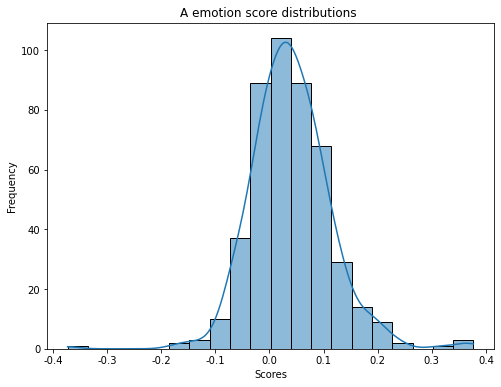

In [99]:

import seaborn as sns

# 示例数据，假设你有一个名为 result_df 的 DataFrame



# 选择要展示的歌曲类别
selected_category = 'A'

# 筛选指定类别的数据
#selected_category_data = result_df[result_df['歌曲类别'] == selected_category]
selected_category_data = result_df
# 创建直方图
plt.figure(figsize=(8, 6))
sns.histplot(selected_category_data['得分'], bins=20, kde=True)
plt.title(f'{selected_category} emotion score distributions ')
plt.xlabel('Scores')
plt.ylabel('Frequency')

plt.show()

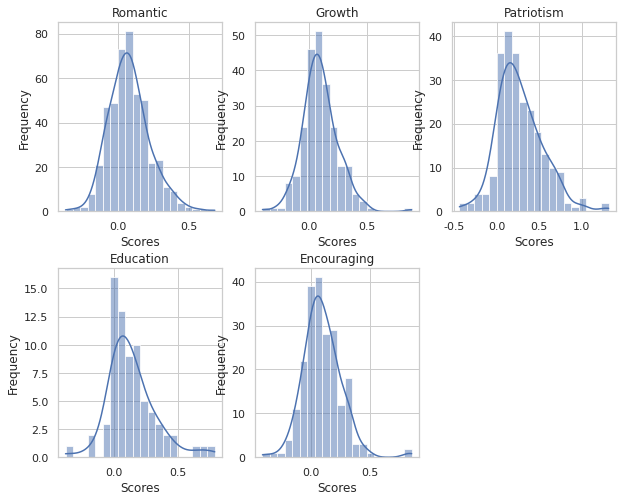

In [118]:
theme_dataframes = total_score
    

# 设置绘图参数
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
categories = ['Romantic', 'Growth', 'Patriotism', 'Education', 'Encouraging']
# 遍历每个 theme
for idx, theme_df in enumerate(theme_dataframes, 1):
    # 选择当前 theme 的数据
    current_theme_data = theme_df

    # 创建直方图
    plt.subplot(2, 3, idx)  # 使用subplot控制子图的位置
    sns.histplot(current_theme_data['得分'], bins=20, kde=True)
    plt.title(str(categories[idx-1] ))
    plt.xlabel('Scores')
    plt.ylabel('Frequency')

# 调整子图布局
plt.subplots_adjust(hspace=0.3)
plt.savefig('/data_new/home/yhr/code/歌词情感分析/各类别情感得分.png')
plt.show()


In [150]:
#方差计算
emotion_dict_data = df_dic

emotion_dict = pd.DataFrame(emotion_dict_data)
def calculate_var(theme):
        song_data = theme
        songs = pd.DataFrame(song_data)

        # 初始化情感得分列表
        song_scores = []

        # 遍历每首歌曲
        for idx, row in songs.iterrows():
            wordlist = jieba.lcut(row['lyric'])
            wordset = set(wordlist)
            # 初始化情感得分列表
            scores = []

            # 遍历歌词
            for word in wordset:
                # 检查词语是否在情感词典中
                word_info = emotion_dict[emotion_dict['词语'] == word]
                if not word_info.empty:
                    # 如果词语在情感词典中，根据情感倾向和强弱进行加分或减分
                    scores.append(word_info['极性'].values[0] * word_info['强度'].values[0])

            # 计算得分的方差
            variance_score = pd.Series(scores).var()

            # 将歌曲名称和得分加入列表
            song_scores.append({'song': row['song_name'], '方差得分': variance_score})

        # 将结果转换为DataFrame
        result_df = pd.DataFrame(song_scores)
        return result_df



In [120]:
df_ly

,singer_name,song_name,lyric,Singer,Birthdate,Year
0,郑冰冰,《Young and dream》原创吉他弹唱demo,《少年与梦》G调作曲 郑冰冰演唱 郑冰冰主歌1有一天我从座位的窗口望下去，看见一群入职的新同...,郑冰冰,1989,2017
1,郑冰冰,风雨里 demo,风雨里作词 白以白作曲 郑冰冰编曲 彭扬演唱 郑冰冰和声 郑冰冰后期 郑冰冰主歌1如果我可以...,郑冰冰,1989,2016
2,郑冰冰,吉他弹唱demo 别让我在你背后哭 升D调,别让我在你背后哭 升D调主歌1冷冷地望着眼前这一幕无所谓还在不在乎你的沉默一向残酷 历来麻木...,郑冰冰,1989,2015
3,郑冰冰,静夜思2018,《静夜思2018》作词 李白&白以白作曲 郑冰冰编曲 王铁辉演唱 郑冰冰和声 郑冰冰念白 郑...,郑冰冰,1989,2022
4,郑冰冰,弹唱demo 海子《面朝大海春暖花开》,面朝大海，春暖花开 G调作词 海子作曲 郑冰冰吉他弹唱 郑冰冰主歌1从明天起，做一个幸福的人...,郑冰冰,1989,2024
...,...,...,...,...,...,...
52791,高晓攀,问莲渔说2018,月照枝头映君来，纷纷扰扰相思台。隔窗相问夫君啊，云罩碧月君影衰。月洒荷塘映水白，鱼儿倚莲释情...,高晓攀,1985,2011
52792,高晓攀,问莲渔说,月照枝头映君来，纷纷扰扰相思台。隔窗相问夫君啊，云罩碧月君影衰。月洒荷塘映水白，鱼儿倚莲释情...,高晓攀,1985,2011
52793,高晓攀,照花台,夜风轻敲窗等我鲜衣云摆荡闻窗外细雨香长夜烛流最殇最念我的那个花间小妹娘啊最想那未染世俗的模样...,高晓攀,1985,2020
52794,高晓攀,问莲渔说,月照枝头映君来，纷纷扰扰相思台。隔窗相问夫君啊，云罩碧月君影衰。月洒荷塘映水白，鱼儿倚莲释情...,高晓攀,1985,2018


In [123]:
df_eason = df_ly[df_ly['singer_name'] =='陈奕迅']

In [128]:
df_eason = df_eason.drop(['Singer','Birthdate'], axis=1)

In [132]:
df_eason = df_eason.sort_values('Year')

,singer_name,song_name,lyric,Year
4307,陈奕迅,我有我爱你,能被你踩到脚底也不用跌低谁奢望你懂得单恋这种造诣未爱我是你不济我寂寞仍旧高贵但你竟将这极品放...,1999
4311,陈奕迅,任我行,天真得只有你令神仙鱼归天要怪谁以为留在原地不够遨游就让它沙滩里戏水那次得你冒险半夜上山争拗中...,1999
4316,陈奕迅,少见不怪,hey！这边的天气渐回暖而你可否开心似我所愿当你话给我成全要跟她好好去恋无谓继续去周旋怎么今...,1999
4145,陈奕迅,"对不起,谢谢",纯白无暇 温柔芬芳你洗的衣服有你的模样满身是汗 脱了又穿你常笑我脏 男人难免啊那种稀松平常的...,1999
4219,陈奕迅,这样的一个麻烦,怎麽形容这样一个麻烦好像称不上是疑猜但是绝对不单纯怎麽形容这样一个麻烦好像称不上是疑猜但是绝...,1999
...,...,...,...,...
4233,陈奕迅,换季,什么事值得让我们掉眼泪爱上了偏偏又无言以对连路人都发现了这种伤悲为什么我们还视而不见心里狂风...,2009
4398,陈奕迅,始终我系我,扭下计会翻转世代心气傲谁及我将百官也整古戏弄试问谁能敌我笑笑 往事不再重要今日我有幸作主角笑...,2009
4369,陈奕迅,低等動物,喉咙很干所以爱上你的吻咀巴需要觉得像被谁期侍过缠绵很好所以爱上你胸襟呼吸需要记得亦被怀念过为...,2009
4158,陈奕迅,让我留在你身边,我从来不说话因为我害怕没有人回答我从来不挣扎因为我知道这世界太大太多时间浪费太多事要面对太多...,2009


In [161]:

singer_df = pd.DataFrame(df_eason)

song_scores = []
# 遍历每首歌曲
for idx, row in singer_df.iterrows():
    wordlist = jieba.lcut(row['lyric'])
    wordset = set(wordlist)
    
    # 初始化情感得分列表
    scores = []
    # 遍历歌词
    for word in wordset:
        # 检查词语是否在情感词典中
        word_info = emotion_dict[emotion_dict['词语'] == word]
        if not word_info.empty:
            # 如果词语在情感词典中，根据情感倾向和强弱进行加分或减分
            score = word_info['极性'].values[0] * word_info['强度'].values[0]
            scores.append(score)
            
    # 计算得分的方差
    variance_score = pd.Series(scores).var()
    mean_score = pd.Series(scores).mean()
    # 将年份和得分加入列表
    song_scores.append({'Year': row['Year'], '情感得分':mean_score,'方差得分': variance_score})

# 将结果转换为DataFrame
result_df = pd.DataFrame(song_scores)

# 打印结果
print(result_df)

# # 使用Seaborn绘制按年份的得分分布
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Year', y='情', data=result_df)
# plt.title('Eason annual score distributions')
# plt.xlabel('Year')
# plt.ylabel('方差得分')
# plt.show()


/data_new/home/yhr/.conda/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/data_new/home/yhr/.conda/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


     Year      情感得分       方差得分
0    1999 -0.068966  15.709360
1    1999  2.772727  26.183983
2    1999  0.714286  15.450549
3    1999  0.222222  12.694444
4    1999 -1.166667  18.166667
..    ...       ...        ...
440  2009 -0.454545   7.272727
441  2009  3.111111  23.111111
442  2009  1.375000  23.450000
443  2009 -1.687500  11.429167
444  2009  0.384615  10.923077

[445 rows x 3 columns]


     Year      情感得分       方差得分
0    1999 -0.068966  15.709360
1    1999  2.772727  26.183983
2    1999  0.714286  15.450549
3    1999  0.222222  12.694444
4    1999 -1.166667  18.166667
..    ...       ...        ...
440  2009 -0.454545   7.272727
441  2009  3.111111  23.111111
442  2009  1.375000  23.450000
443  2009 -1.687500  11.429167
444  2009  0.384615  10.923077

[445 rows x 3 columns]


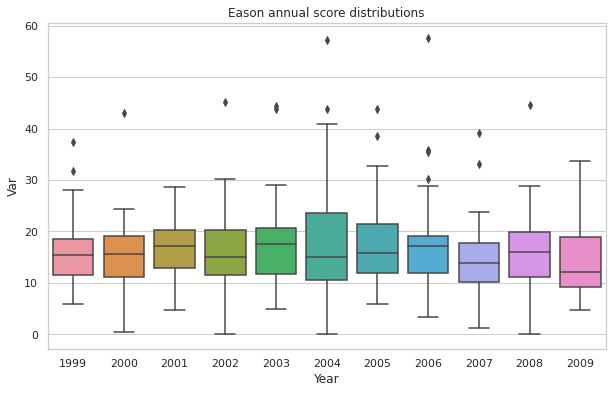

In [162]:
print(result_df)

# 使用Seaborn绘制按年份的得分分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='方差得分', data=result_df)
plt.title('Eason annual score distributions')
plt.xlabel('Year')
plt.ylabel('Var')
plt.savefig('/data_new/home/yhr/code/歌词情感分析/eason-var.png')
plt.show()

     Year      情感得分       方差得分
0    1999 -0.068966  15.709360
1    1999  2.772727  26.183983
2    1999  0.714286  15.450549
3    1999  0.222222  12.694444
4    1999 -1.166667  18.166667
..    ...       ...        ...
440  2009 -0.454545   7.272727
441  2009  3.111111  23.111111
442  2009  1.375000  23.450000
443  2009 -1.687500  11.429167
444  2009  0.384615  10.923077

[445 rows x 3 columns]


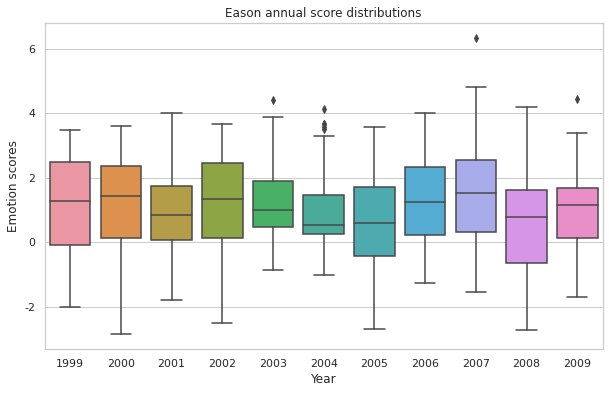

In [163]:
print(result_df)

# 使用Seaborn绘制按年份的得分分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='情感得分', data=result_df)
plt.title('Eason annual score distributions')
plt.xlabel('Year')
plt.ylabel('Emotion scores')
plt.savefig('/data_new/home/yhr/code/歌词情感分析/eason-score.png')
plt.show()

In [ ]:
calculate_score